<a href="https://colab.research.google.com/github/maisiejacinda/datamining/blob/main/analisis_tingkat_kemiskinan_aceh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# === 1. Import Library ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === 2. Load Dataset ===
# Upload file dulu di Colab (Klasifikasi_Tingkat_Kemiskinan_di_Indonesia.csv)
from google.colab import files
uploaded = files.upload()

# Baca dataset
df = pd.read_csv(next(iter(uploaded)))
print("Jumlah baris dan kolom:", df.shape)
df.head()


Saving Klasifikasi Tingkat Kemiskinan di Indonesia (1).csv to Klasifikasi Tingkat Kemiskinan di Indonesia (1).csv
Jumlah baris dan kolom: (514, 13)


,Provinsi,Kab/Kota,Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),Rata-rata Lama Sekolah Penduduk 15+ (Tahun),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),Indeks Pembangunan Manusia,Umur Harapan Hidup (Tahun),Persentase rumah tangga yang memiliki akses terhadap sanitasi layak,Persentase rumah tangga yang memiliki akses terhadap air minum layak,Tingkat Pengangguran Terbuka,Tingkat Partisipasi Angkatan Kerja,PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah),Klasifikasi Kemiskinan
0,ACEH,Simeulue,18.98,9.48,7148,66.41,65.28,71.56,87.45,5.71,71.15,1648096,0
1,ACEH,Aceh Singkil,20.36,8.68,8776,69.22,67.43,69.56,78.58,8.36,62.85,1780419,1
2,ACEH,Aceh Selatan,13.18,8.88,8180,67.44,64.40,62.55,79.65,6.46,60.85,4345784,0
3,ACEH,Aceh Tenggara,13.41,9.67,8030,69.44,68.22,62.71,86.71,6.43,69.62,3487157,0
4,ACEH,Aceh Timur,14.45,8.21,8577,67.83,68.74,66.75,83.16,7.13,59.48,8433526,0


In [ ]:
# === 3. Cek & Bersihkan Data ===
df.info()
df.isnull().sum()

# Hilangkan kolom non-numerik yang tidak relevan untuk pemodelan
df = df.drop(['Provinsi', 'Kab/Kota'], axis=1)

# Cek kembali tipe data
df.dtypes

# Isi missing values dengan rata-rata (jika ada)
df = df.fillna(df.mean(numeric_only=True))

# === 4. Pisahkan Fitur dan Label ===
X = df.drop('Klasifikasi Kemiskinan', axis=1)
y = df['Klasifikasi Kemiskinan']

# Normalisasi agar model lebih stabil
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# === 5. Bagi Data ke Training dan Testing ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 13 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Provinsi                                                              514 non-null    object 
 1   Kab/Kota                                                              514 non-null    object 
 2   Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)       514 non-null    float64
 3   Rata-rata Lama Sekolah Penduduk 15+ (Tahun)                           514 non-null    float64
 4   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)          514 non-null    int64  
 5   Indeks Pembangunan Manusia                                            514 non-null    float64
 6   Umur Harapan Hidup (Tahun)                                            514 non-null    float64
 7  

In [ ]:
# === 6. Model 1: Logistic Regression ===
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

acc_logreg = accuracy_score(y_test, y_pred_logreg)
print("Akurasi Logistic Regression:", round(acc_logreg*100, 2), "%")
print(classification_report(y_test, y_pred_logreg))


Akurasi Logistic Regression: 90.29 %
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        87
           1       0.88      0.44      0.58        16

    accuracy                           0.90       103
   macro avg       0.89      0.71      0.76       103
weighted avg       0.90      0.90      0.89       103



Akurasi Decision Tree: 97.09 %
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        87
           1       0.93      0.88      0.90        16

    accuracy                           0.97       103
   macro avg       0.96      0.93      0.94       103
weighted avg       0.97      0.97      0.97       103



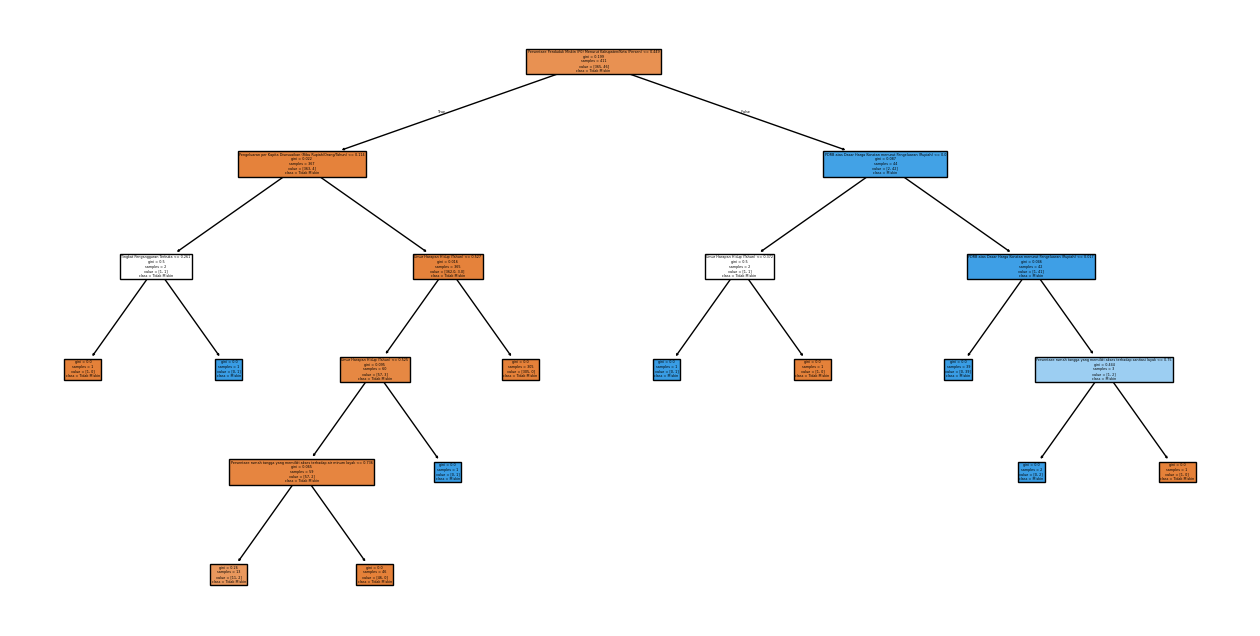

In [ ]:
# === 7. Model 2: Decision Tree ===
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
print("Akurasi Decision Tree:", round(acc_dt*100, 2), "%")
print(classification_report(y_test, y_pred_dt))

# Visualisasi pohon (opsional)
plt.figure(figsize=(16,8))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Tidak Miskin', 'Miskin'])
plt.show()


In [ ]:
# === 8. Model 3: Random Forest ===
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print("Akurasi Random Forest:", round(acc_rf*100, 2), "%")
print(classification_report(y_test, y_pred_rf))


Akurasi Random Forest: 99.03 %
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        87
           1       0.94      1.00      0.97        16

    accuracy                           0.99       103
   macro avg       0.97      0.99      0.98       103
weighted avg       0.99      0.99      0.99       103



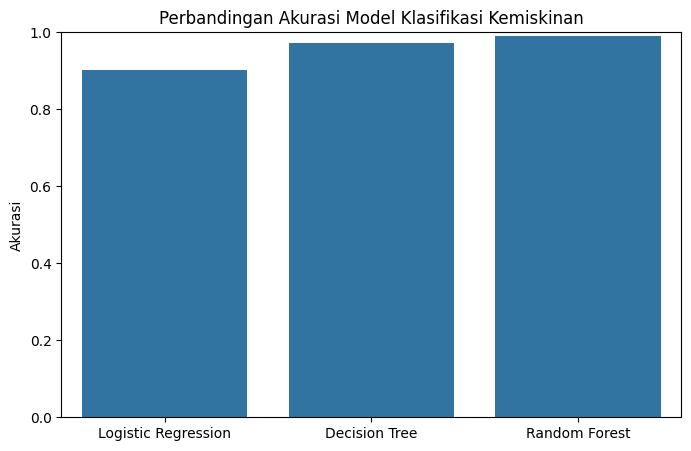

Model terbaik: Random Forest


In [ ]:
# === 9. Bandingkan Akurasi Semua Model ===
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [acc_logreg, acc_dt, acc_rf]

plt.figure(figsize=(8,5))
sns.barplot(x=model_names, y=accuracies)
plt.title('Perbandingan Akurasi Model Klasifikasi Kemiskinan')
plt.ylabel('Akurasi')
plt.ylim(0,1)
plt.show()

print("Model terbaik:", model_names[np.argmax(accuracies)])


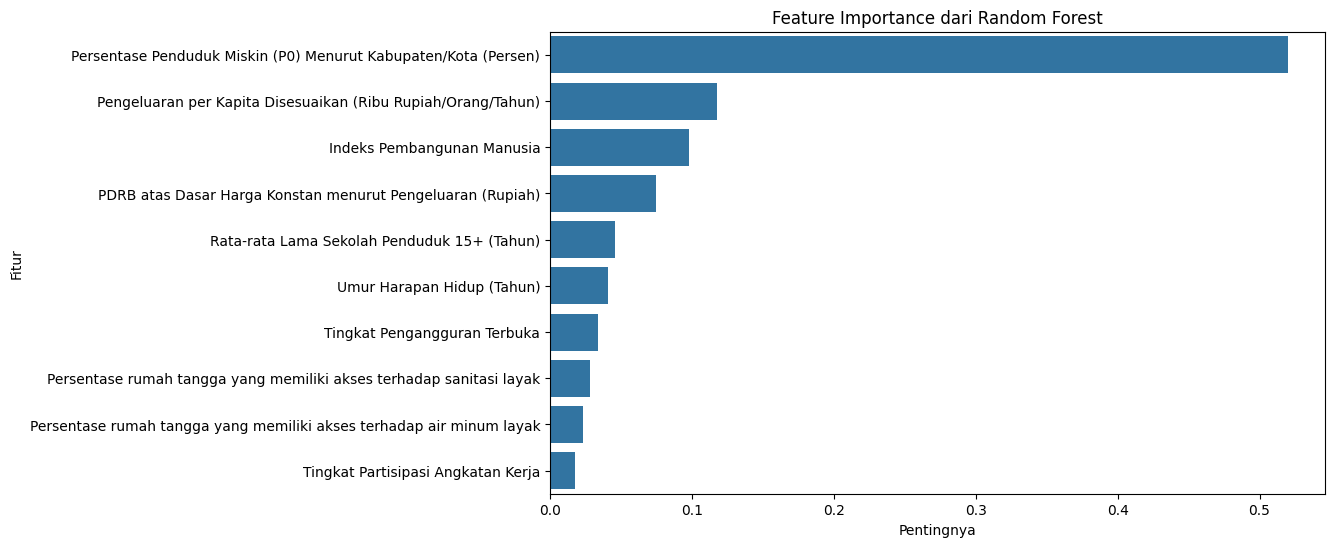

,Fitur,Pentingnya
0,Persentase Penduduk Miskin (P0) Menurut Kabupa...,0.520144
2,Pengeluaran per Kapita Disesuaikan (Ribu Rupia...,0.117684
3,Indeks Pembangunan Manusia,0.098156
9,PDRB atas Dasar Harga Konstan menurut Pengelua...,0.074503
1,Rata-rata Lama Sekolah Penduduk 15+ (Tahun),0.046130
4,Umur Harapan Hidup (Tahun),0.040645
7,Tingkat Pengangguran Terbuka,0.034011
5,Persentase rumah tangga yang memiliki akses te...,0.028416
6,Persentase rumah tangga yang memiliki akses te...,0.022976
8,Tingkat Partisipasi Angkatan Kerja,0.017335


In [ ]:
# === 10. Analisis Feature Importance (dari Random Forest) ===
importances = rf.feature_importances_
feature_importance = pd.DataFrame({'Fitur': X.columns, 'Pentingnya': importances})
feature_importance = feature_importance.sort_values(by='Pentingnya', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Pentingnya', y='Fitur', data=feature_importance)
plt.title('Feature Importance dari Random Forest')
plt.show()

feature_importance


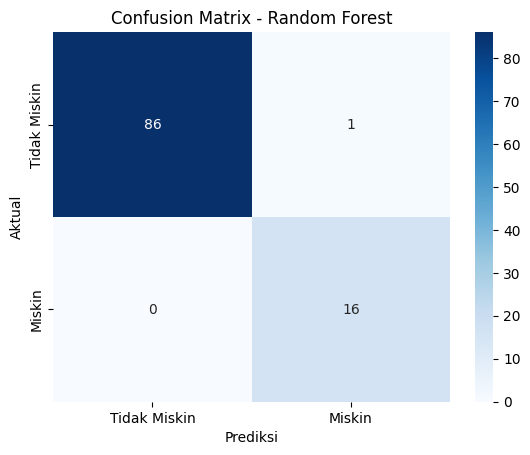

In [ ]:
# === 11. Confusion Matrix untuk Model Terbaik ===
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Miskin', 'Miskin'],
            yticklabels=['Tidak Miskin', 'Miskin'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [ ]:
# === 3. Mengecek Informasi Data ===
print(df.info())
print(df.describe())

# Mengecek apakah ada data kosong
print("\nJumlah data kosong per kolom:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)       514 non-null    float64
 1   Rata-rata Lama Sekolah Penduduk 15+ (Tahun)                           514 non-null    float64
 2   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)          514 non-null    int64  
 3   Indeks Pembangunan Manusia                                            514 non-null    float64
 4   Umur Harapan Hidup (Tahun)                                            514 non-null    float64
 5   Persentase rumah tangga yang memiliki akses terhadap sanitasi layak   514 non-null    float64
 6   Persentase rumah tangga yang memiliki akses terhadap air minum layak  514 non-null    float64
 7  

In [ ]:
# === 1. Import Library ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler   # <--- ini wajib ada
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
# === 4. Memilih Fitur Numerik untuk Clustering ===
features = [
    'Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)',
    'Rata-rata Lama Sekolah Penduduk 15+ (Tahun)',
    'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)',
    'Indeks Pembangunan Manusia',
    'Umur Harapan Hidup (Tahun)',
    'Persentase rumah tangga yang memiliki akses terhadap sanitasi layak',
    'Persentase rumah tangga yang memiliki akses terhadap air minum layak',
    'Tingkat Pengangguran Terbuka',
    'PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)'
]

X = df[features]

# === 5. Normalisasi Data ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


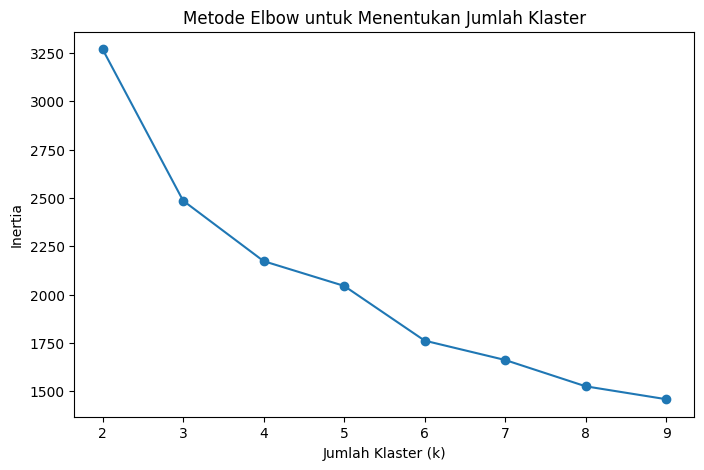

In [ ]:
# === 6. Menentukan Jumlah Klaster (Metode Elbow) ===
inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(2,10), inertia, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia')
plt.show()


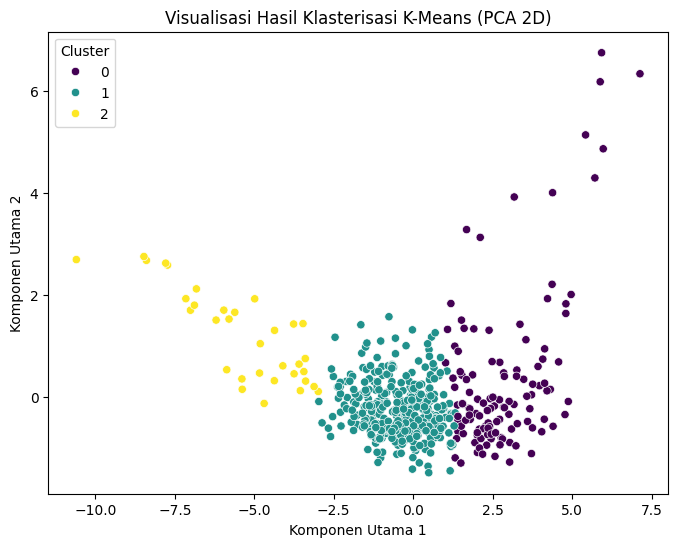

In [ ]:
# === 8. Visualisasi PCA 2D ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette='viridis')
plt.title('Visualisasi Hasil Klasterisasi K-Means (PCA 2D)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend(title='Cluster')
plt.show()


In [ ]:
# === 9. Analisis Karakteristik Tiap Klaster ===
cluster_summary = df.groupby('Cluster')[features].mean().round(2)
print(cluster_summary)


         Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)  \
Cluster                                                                    
0                                                     7.30                 
1                                                    12.21                 
2                                                    31.11                 

         Rata-rata Lama Sekolah Penduduk 15+ (Tahun)  \
Cluster                                                
0                                              10.26   
1                                               8.10   
2                                               5.37   

         Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)  \
Cluster                                                                 
0                                                 13542.28              
1                                                  9640.13              
2                                             

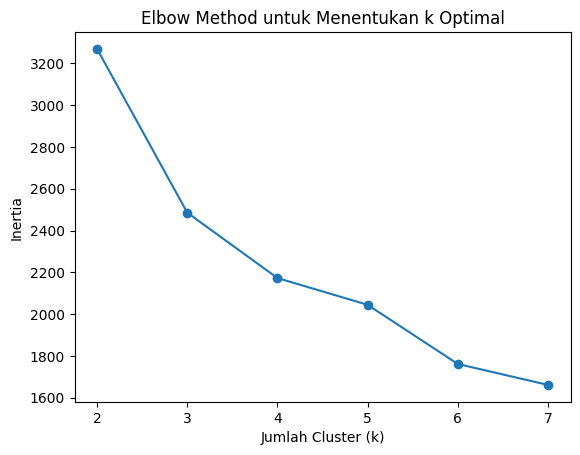

In [ ]:
inertia = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 8), inertia, marker='o')
plt.title("Elbow Method untuk Menentukan k Optimal")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


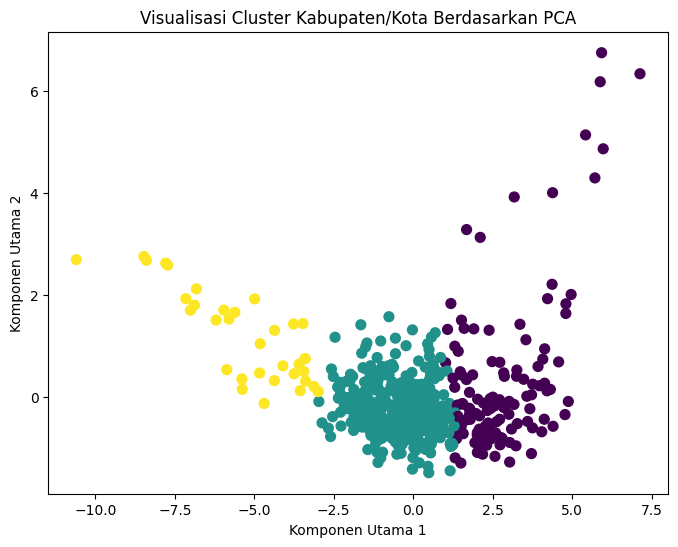

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], c=df['Cluster'], cmap='viridis', s=50)
plt.title("Visualisasi Cluster Kabupaten/Kota Berdasarkan PCA")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering

hier = AgglomerativeClustering(n_clusters=3)
df['Cluster_HC'] = hier.fit_predict(X_scaled)
